In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df = pd.read_csv('economic_index.csv')

In [79]:
df.head()
df.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [80]:
###Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [81]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [82]:
### EDA
print(df.head())
print(df.isnull().sum(axis=0))

   interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64


/home/ishan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ishan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ishan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


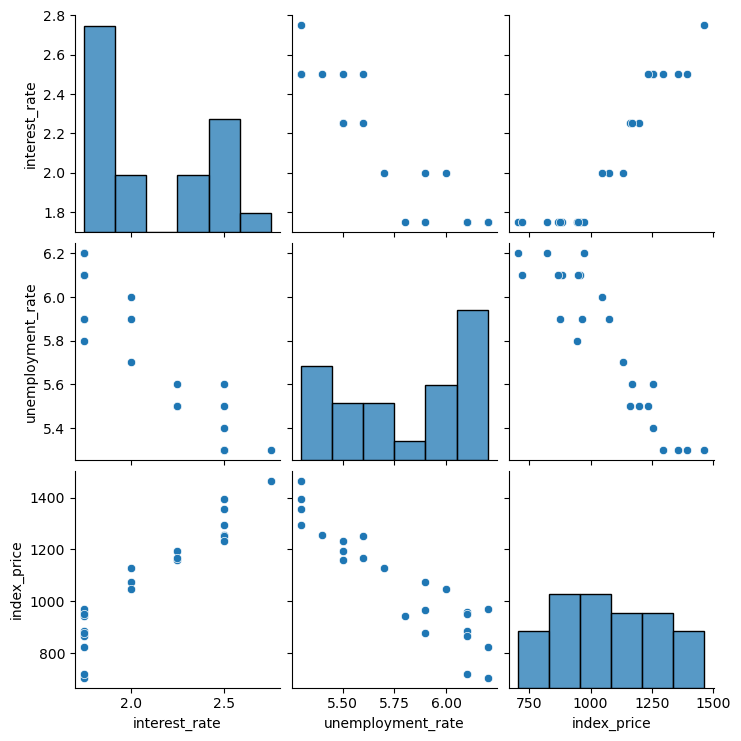

In [83]:
## Intro Visualization
import seaborn as sns 
sns.pairplot(df)

Text(0.5, 1.0, 'Comparison')

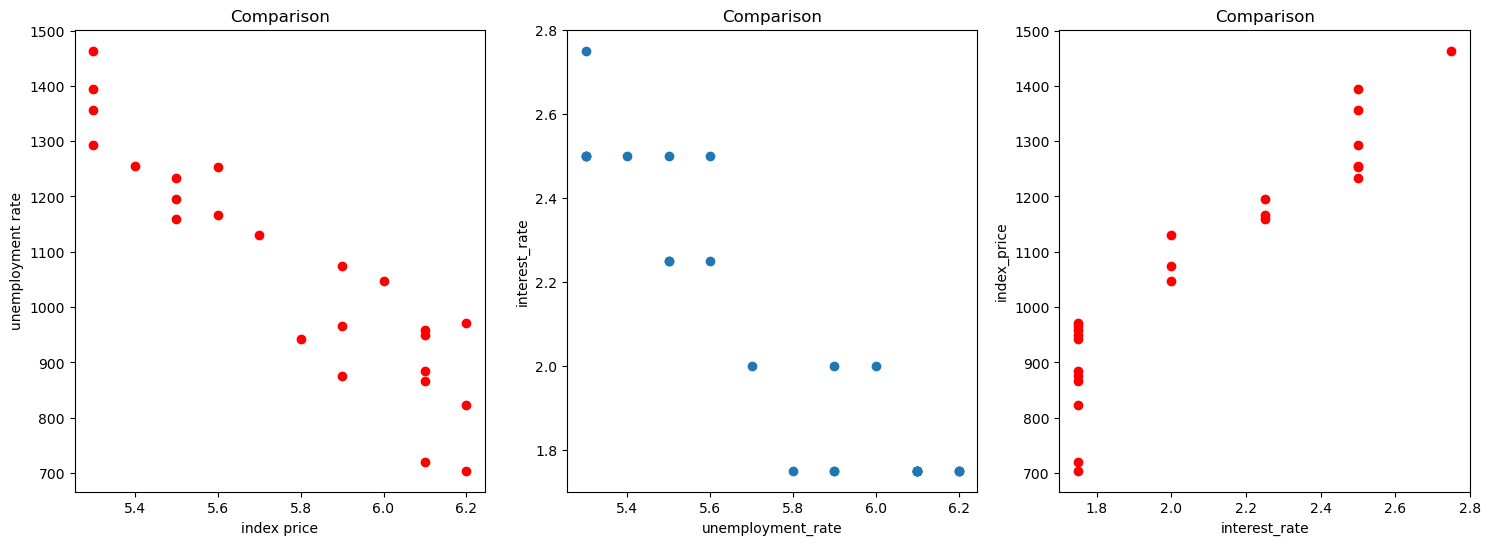

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(df['unemployment_rate'], df['index_price'], color='r')
axes[0].set_xlabel('index price')
axes[0].set_ylabel('unemployment rate')
axes[0].set_title('Comparison')

axes[1].scatter(df['unemployment_rate'], df['interest_rate'])
axes[1].set_xlabel('unemployment_rate')
axes[1].set_ylabel('interest_rate')
axes[1].set_title('Comparison')

axes[2].scatter(df['interest_rate'], df['index_price'], color='r')
axes[2].set_xlabel('interest_rate')
axes[2].set_ylabel('index_price')
axes[2].set_title('Comparison')

<Axes: xlabel='interest_rate', ylabel='index_price'>

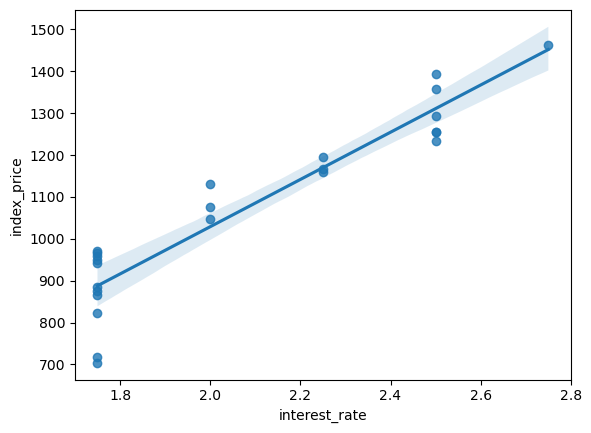

In [93]:
import seaborn as sns

sns.regplot(data = df, x = df['interest_rate'], y = df['index_price'])

In [85]:
df.corr() ## Seeing evidence behind the plottings

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [86]:
### Enough Evidence to use multiple linear regression
X = df.loc[:, ['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [109]:
## Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
## Standardize the data with mean 0 and standard deviation 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [111]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
## Building the model
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [113]:
## Learning to do cross validation

from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [114]:
np.mean(validation_score)

-5674.031667186765

In [115]:
## Predicitons

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

In [116]:
print(y_pred)

[1204.14403741  821.62603274 1406.38534684  857.68137178  994.85736555]


In [117]:
## Performance metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mae, mse, rmse)

71.71878409976621 6957.105303258827 83.4092638935198


In [118]:
### R-squared 
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

### Adjusted R-squared
print(1 - (1 - score) * (len(y_test)-1)/ (len(y_test)-X_test.shape[1]-1))

0.8254940547158577
0.6509881094317154


Text(0.5, 1.0, 'Performance')

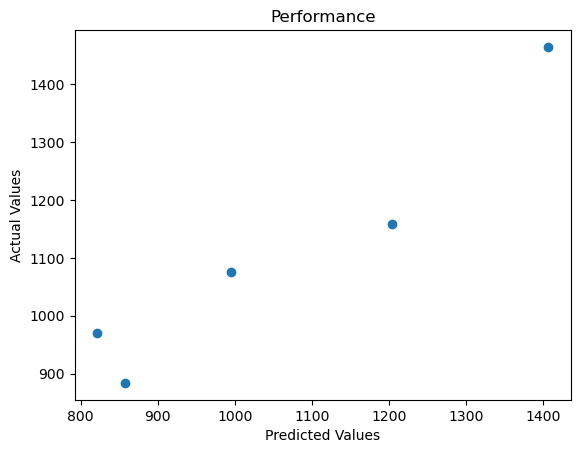

In [120]:
## Checking the assumptions

## ## Check if there is a linear relation between predicted and actual values
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Performance') 

In [121]:
## Check if the residuals folow a normal distribution
residuals = y_pred - y_test

/home/ishan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


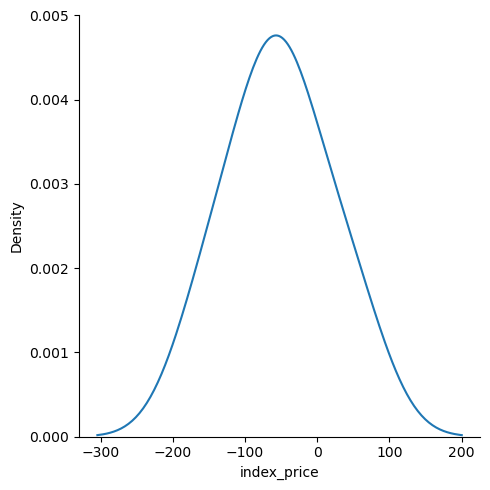

In [123]:
sns.displot(residuals, kind='kde')

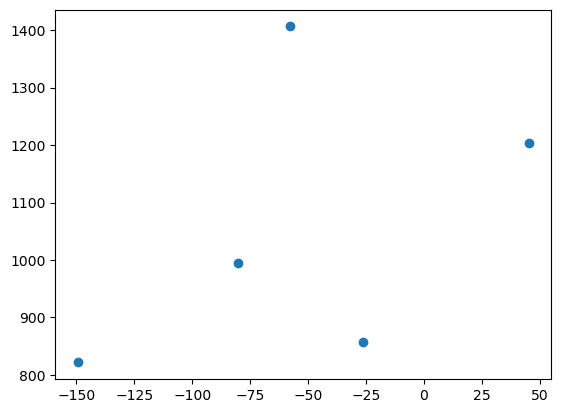

In [124]:
## Check if the plot between residuals and predicted values show random pattern

plt.scatter(residuals, y_pred)

In [128]:
## OLS method of regression 
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                       0.751
Time:                        17:34:26   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
regression.coef_

array([  86.63351334, -114.04857249])